In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

data= pd.read_csv("titanic.csv")
data.head(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0.0,0,0,1


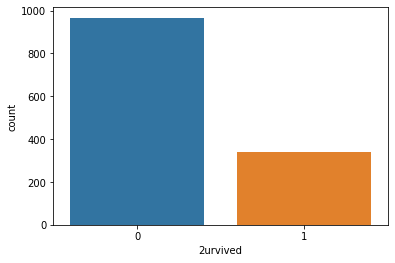

In [ ]:
sns.countplot(x="2urvived",data=data)

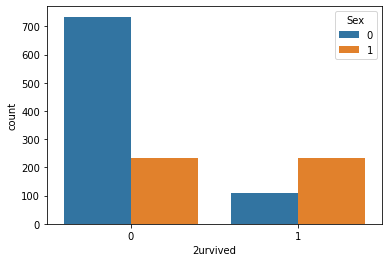

In [ ]:
sns.countplot(x="2urvived",hue="Sex",data=data)

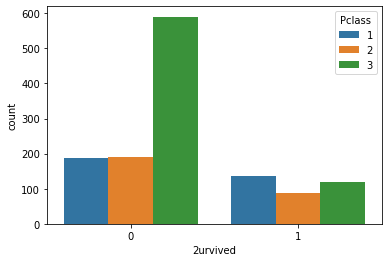

In [ ]:
sns.countplot(x="2urvived",hue="Pclass",data=data)

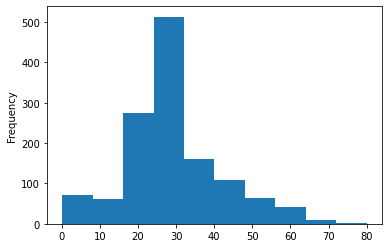

In [ ]:
data["Age"].plot.hist()

In [ ]:
data.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
data.drop(data.columns[[5,6,7,8,9,10,11]],axis=1,inplace=True)

In [ ]:
data.head(5)

,Passengerid,Age,Fare,Sex,sibsp,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
data.drop(data.columns[[6,7,8,9,10,11,12,13]],axis=1,inplace=True)

In [ ]:
data.head(5)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
data.drop(data.columns[[7,8,10,11]],axis=1,inplace=True)

In [ ]:
data.head(5)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [ ]:
data.drop(data.columns[[0]],axis=1,inplace=True)

In [ ]:
embark= pd.get_dummies(data["Embarked"],drop_first=True)
embark.head(5)

,1.0,2.0
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
pc= pd.get_dummies(data["Pclass"],drop_first=True)
pc.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
data=pd.concat([data,embark,pc],axis=1)

In [ ]:
data.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived,1.0,2.0,2,3
0,22.0,7.2500,0,1,0,3,2.0,0,0,1,0,1
1,38.0,71.2833,1,1,0,1,0.0,1,0,0,0,0
2,26.0,7.9250,1,0,0,3,2.0,1,0,1,0,1
3,35.0,53.1000,1,1,0,1,2.0,1,0,1,0,0
4,35.0,8.0500,0,0,0,3,2.0,0,0,1,0,1


In [ ]:
data.drop(data.columns[[5,6]],axis=1,inplace=True)

In [ ]:
data.head(5)

,Age,Fare,Sex,sibsp,Parch,2urvived,1.0,2.0,2,3
0,22.0,7.2500,0,1,0,0,0,1,0,1
1,38.0,71.2833,1,1,0,1,0,0,0,0
2,26.0,7.9250,1,0,0,1,0,1,0,1
3,35.0,53.1000,1,1,0,1,0,1,0,0
4,35.0,8.0500,0,0,0,0,0,1,0,1


In [ ]:
data = data.rename({"1.0":"Q"},axis='columns') 

In [33]:
X=data.drop("2urvived",axis=1)
y=data["2urvived"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.33)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model=LogisticRegression()

In [39]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred=model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,pred)

array([[278,  28],
       [ 82,  44]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7453703703703703